## WBA CVS pair 
### Entry Threshold:	2.00 | Exit Threshold:	0.50		
### Max Duration:	45 | MA Period:	60 | MA Type:	SMA	| StdDev Period:	30 | Sharpe Ratio:	1.824

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import statsmodels
from pandas_datareader import data
import datetime
import quandl

In [2]:
start= datetime.datetime(2017, 1, 1)  # The start of the year for example
end= datetime.datetime(2020, 7, 30)

In [3]:
ticker_1 = "CVS"
ticker_2 = "WBA"

In [4]:
df_tickr1 = data.DataReader(name= ticker_1, data_source= "yahoo", start= start, end= end)
df_tickr2 = data.DataReader(name= ticker_2, data_source= "yahoo", start= start, end= end)

In [5]:
df_tickr1.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-26,76.790001,74.639999,76.760002,74.940002,10128300.0,74.940002
2019-11-27,75.559998,74.629997,75.099998,75.040001,7823800.0,75.040001
2019-11-29,75.400002,74.430000,74.690002,75.269997,4463600.0,75.269997
2019-12-02,75.910004,75.010002,75.220001,75.550003,5264500.0,75.550003
2019-12-03,74.790001,73.599998,74.389999,74.709999,6312756.0,74.709999


In [6]:
df_tickr2.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-11-26,60.540001,58.939999,60.419998,59.630001,7656500.0,59.630001
2019-11-27,60.169998,59.250000,59.790001,60.110001,4033800.0,60.110001
2019-11-29,59.990002,59.450001,59.959999,59.599998,2177900.0,59.599998
2019-12-02,59.500000,58.459999,59.299999,59.270000,5695000.0,59.270000
2019-12-03,59.075001,57.730000,58.799999,58.990002,4616572.0,58.990002


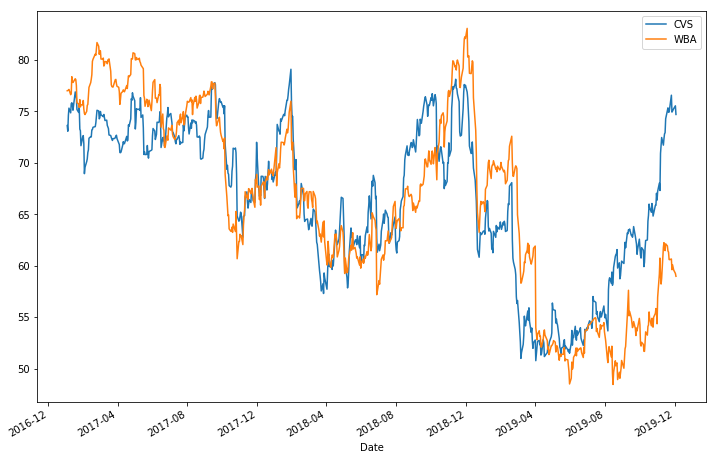

In [7]:
df_tickr1['Adj Close'].plot(label='{}'.format(ticker_1),figsize=(12,8))
df_tickr2['Adj Close'].plot(label='{}'.format(ticker_2))
plt.legend();

In [8]:
spread_ratio = df_tickr1['Adj Close']/df_tickr2['Adj Close']

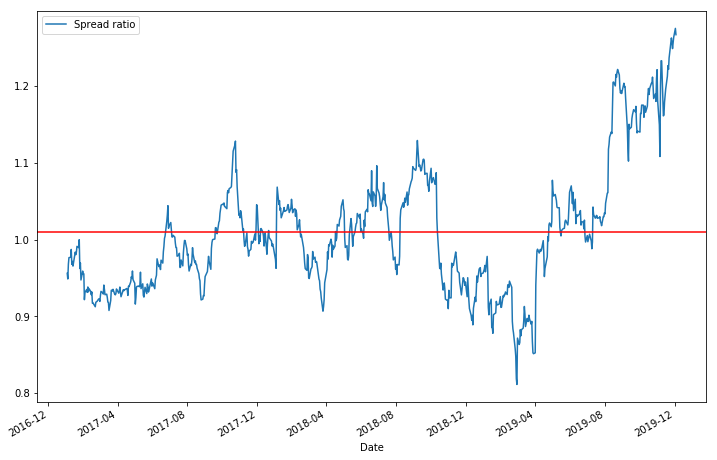

In [9]:
spread_ratio.plot(label='Spread ratio',figsize=(12,8))
plt.axhline(spread_ratio.mean(),c='r')
plt.legend();

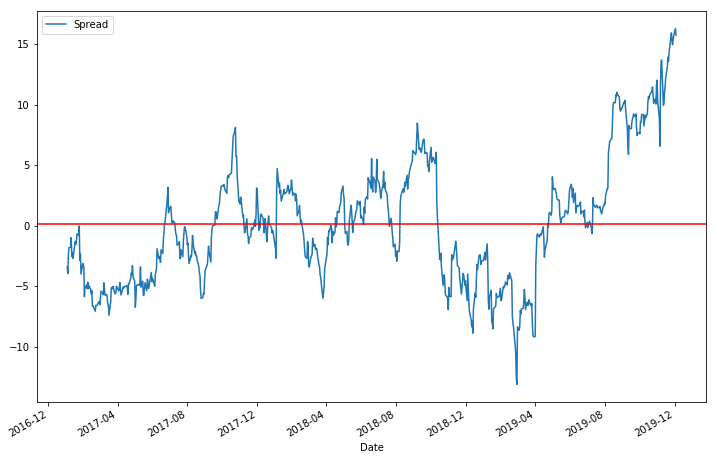

In [10]:
spread = df_tickr1['Adj Close'] - df_tickr2['Adj Close']
spread.plot(label='Spread',figsize=(12,8))
plt.axhline(spread.mean(),c='r')
plt.legend();

In [11]:
def zscore(stocks):
    return (stocks - stocks.mean()) / np.std(stocks)

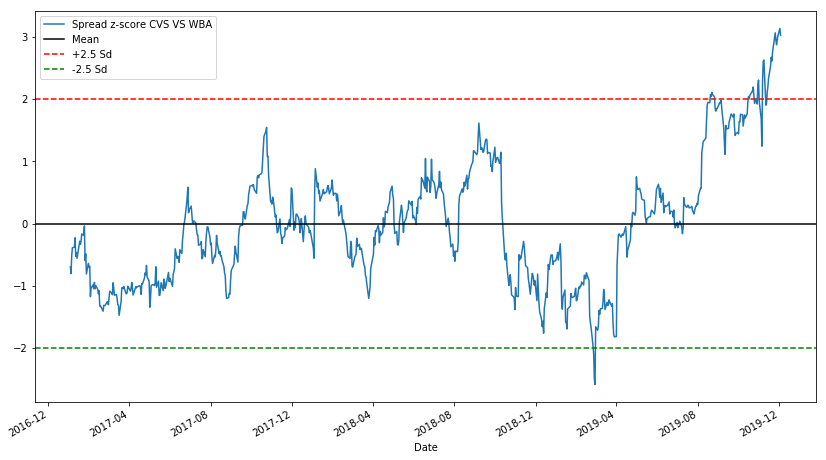

In [12]:
zscore(spread).plot(figsize=(14,8))
plt.axhline(zscore(spread).mean(), color='black')
plt.axhline(2.0, c='r', ls='--')
plt.axhline(-2.0, c='g', ls='--')
plt.legend(['Spread z-score {} VS {}'.format(ticker_1, ticker_2), 'Mean', '+2.5 Sd', '-2.5 Sd']);

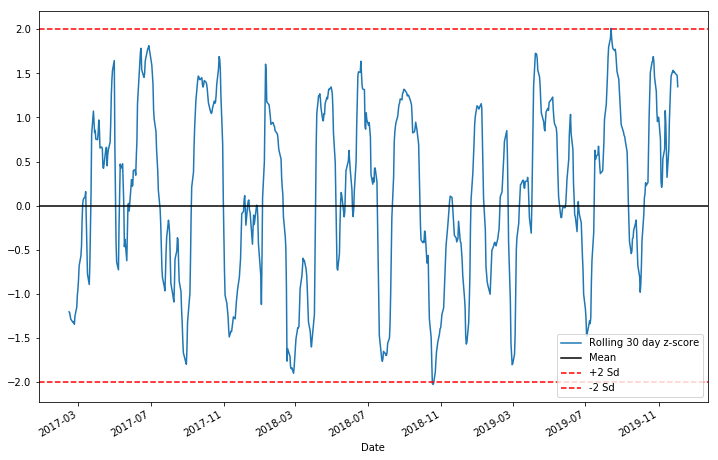

In [13]:
#1 day moving average of the price spread
spread_mavg1 = spread.rolling(5).mean()

# 30 day moving average of the price spread
spread_mavg30 = spread.rolling(30).mean()

# Take a rolling 30 day standard deviation
std_30 = spread.rolling(30).std()

# Compute the z score for each day
zscore_30_1 = (spread_mavg1 - spread_mavg30)/std_30



zscore_30_1.plot(figsize=(12,8),label='Rolling 30 day Z score')
plt.axhline(0, color='black')
plt.axhline(2.0, color='red', linestyle='--')
plt.axhline(-2.0, color='red',linestyle='--')
plt.legend(['Rolling 30 day z-score', 'Mean', '+2 Sd', '-2 Sd']);

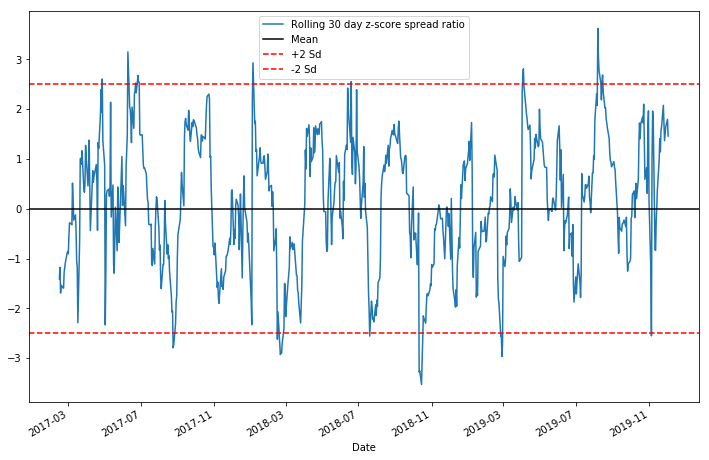

In [14]:
#1 day moving average of the price spread
spreadratio_mavg1 = spread_ratio.rolling(1).mean()

# 30 day moving average of the price spread
spreadratio_mavg30 = spread_ratio.rolling(30).mean()

# Take a rolling 30 day standard deviation
std_30ratio = spread_ratio.rolling(30).std()

# Compute the z score for each day
zscore_30_1_ratio = (spreadratio_mavg1 - spreadratio_mavg30)/std_30ratio



zscore_30_1_ratio.plot(figsize=(12,8),label='Rolling 30 day Z score for spread ratio')
plt.axhline(0, color='black')
plt.axhline(2.50, color='red', linestyle='--')
plt.axhline(-2.50, color='red',linestyle='--')
plt.legend(['Rolling 30 day z-score spread ratio', 'Mean', '+2 Sd', '-2 Sd']);

In [15]:
from statsmodels.tsa.stattools import coint

In [16]:
y0 = df_tickr1['Adj Close']
y1 = df_tickr2['Adj Close']

In [17]:
t_stat_summary = statsmodels.tsa.stattools.coint(y0, y1, trend='c', method='aeg', maxlag=None, autolag='aic', return_results=True) 

In [18]:
print('----------------------------------------')
print('T-stat for the pair {} VS {}:'.format(ticker_1,ticker_2), t_stat_summary[0])
print('Alpha value for the T-stat:  {}'.format(t_stat_summary[1]))
print('--------------------------------------')
print('T-stat 99%:  {}'.format(t_stat_summary[2][0]))
print('T-stat 95%:  {}'.format(t_stat_summary[2][1]))
print('T-stat 90%:  {}'.format(t_stat_summary[2][2]))

----------------------------------------
T-stat for the pair CVS VS WBA: -1.9686724682654282
Alpha value for the T-stat:  0.5448191312564581
--------------------------------------
T-stat 99%:  -3.9114230750840826
T-stat 95%:  -3.3444670512810992
T-stat 90%:  -3.050233250302549


In [19]:
from statsmodels.tsa.stattools import adfuller
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('\n-----------Augmented Dickey-Fuller Test: ----------\n')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("\nstrong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is mean-reverting\n")
    else:
        print("\nWeak evidence against null hypothesis, time series has a unit root, indicating it is non-mean-reverting\n ")
    
    print("Dickey Fuller Confidence Intervals:  ", adfuller(spread_ratio)[4])

adf_check(spread_ratio)


-----------Augmented Dickey-Fuller Test: ----------

ADF Test Statistic : -1.4864241994628615
p-value : 0.5402160853183455
#Lags Used : 0
Number of Observations Used : 734

Weak evidence against null hypothesis, time series has a unit root, indicating it is non-mean-reverting
 
Dickey Fuller Confidence Intervals:   {'1%': -3.439290485895927, '5%': -2.8654856985173414, '10%': -2.568871126669587}


In [20]:
np.corrcoef(df_tickr1['Adj Close'],df_tickr2['Adj Close'])

array([[1.        , 0.82843498],
       [0.82843498, 1.        ]])

In [21]:
np.cov(df_tickr1['Adj Close'],df_tickr2['Adj Close'])

array([[55.89025813, 56.68618493],
       [56.68618493, 83.77250255]])

# Differencing method of spread; GARCH volatility method of spread and final use log returns minus average log returns of spread over GARCH - to be done next

In [22]:
zscore_30_1_ratio[-20:]

Date
2019-11-05   -2.549150
2019-11-06    0.955952
2019-11-07    1.964466
2019-11-08    1.802824
2019-11-11   -0.823681
2019-11-12   -0.834058
2019-11-13   -0.224461
2019-11-14    0.051844
2019-11-15    0.384974
2019-11-18    0.987146
2019-11-19    1.410739
2019-11-20    1.145328
2019-11-21    1.565673
2019-11-22    1.653063
2019-11-25    2.077542
2019-11-26    1.727669
2019-11-27    1.367656
2019-11-29    1.647650
2019-12-02    1.796943
2019-12-03    1.461946
Name: Adj Close, dtype: float64

In [23]:
spread_ratio[-20:]

Date
2019-11-05    1.108013
2019-11-06    1.201183
2019-11-07    1.232567
2019-11-08    1.232442
2019-11-11    1.160873
2019-11-12    1.162133
2019-11-13    1.178513
2019-11-14    1.186364
2019-11-15    1.195526
2019-11-18    1.212464
2019-11-19    1.226200
2019-11-20    1.221389
2019-11-21    1.236226
2019-11-22    1.242739
2019-11-25    1.262238
2019-11-26    1.256750
2019-11-27    1.248378
2019-11-29    1.262919
2019-12-02    1.274675
2019-12-03    1.266486
Name: Adj Close, dtype: float64